In [1]:
#import libraries 

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
plt.style.use('ggplot')
#pd.set_option('max_colums',200)

### Step 1: Import data and data understanding

In [3]:
df = pd.read_csv(r"C:\Users\senay\Desktop\Rob Mulla\coaster_db.csv")
df.head()

,coaster_name,Length,Speed,Location,Status,Opening date,Type,Manufacturer,Height restriction,Model,...,speed1,speed2,speed1_value,speed1_unit,speed_mph,height_value,height_unit,height_ft,Inversions_clean,Gforce_clean
0,Switchback Railway,600 ft (180 m),6 mph (9.7 km/h),Coney Island,Removed,"June 16, 1884",Wood,LaMarcus Adna Thompson,NaN,Lift Packed,...,6 mph,9.7 km/h,6.0,mph,6.0,50.0,ft,NaN,0,2.9
1,Flip Flap Railway,NaN,NaN,Sea Lion Park,Removed,1895,Wood,Lina Beecher,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),NaN,NaN,"Cleveland, Ohio, United States",Closed,NaN,Other,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN


In [4]:
df.shape

(1087, 56)

In [5]:
df.describe()

,Inversions,year_introduced,latitude,longitude,speed1_value,speed_mph,height_value,height_ft,Inversions_clean,Gforce_clean
count,932.000000,1087.000000,812.000000,812.000000,937.000000,937.000000,965.000000,171.000000,1087.000000,362.000000
mean,1.547210,1994.986201,38.373484,-41.595373,53.850374,48.617289,89.575171,101.996491,1.326587,3.824006
std,2.114073,23.475248,15.516596,72.285227,23.385518,16.678031,136.246444,67.329092,2.030854,0.989998
min,0.000000,1884.000000,-48.261700,-123.035700,5.000000,5.000000,4.000000,13.100000,0.000000,0.800000
25%,0.000000,1989.000000,35.031050,-84.552200,40.000000,37.300000,44.000000,51.800000,0.000000,3.400000
50%,0.000000,2000.000000,40.289800,-76.653600,50.000000,49.700000,79.000000,91.200000,0.000000,4.000000
75%,3.000000,2010.000000,44.799600,2.778100,63.000000,58.000000,113.000000,131.200000,2.000000,4.500000
max,14.000000,2022.000000,63.230900,153.426500,240.000000,149.100000,3937.000000,377.300000,14.000000,12.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1087 entries, 0 to 1086
Data columns (total 56 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   coaster_name                   1087 non-null   object 
 1   Length                         953 non-null    object 
 2   Speed                          937 non-null    object 
 3   Location                       1087 non-null   object 
 4   Status                         874 non-null    object 
 5   Opening date                   837 non-null    object 
 6   Type                           1087 non-null   object 
 7   Manufacturer                   1028 non-null   object 
 8   Height restriction             831 non-null    object 
 9   Model                          744 non-null    object 
 10  Height                         965 non-null    object 
 11  Inversions                     932 non-null    float64
 12  Lift/launch system             795 non-null    o

In [7]:
df.isna().sum()

coaster_name                        0
Length                            134
Speed                             150
Location                            0
Status                            213
Opening date                      250
Type                                0
Manufacturer                       59
Height restriction                256
Model                             343
Height                            122
Inversions                        155
Lift/launch system                292
Cost                              705
Trains                            369
Park section                      600
Duration                          322
Capacity                          512
G-force                           725
Designer                          509
Max vertical angle                730
Drop                              593
Soft opening date                 991
Fast Lane available              1018
Replaced                          914
Track layout                      752
Fastrack ava

In [8]:
df[['coaster_name','Location','Type','year_introduced','Type_Main','Inversions_clean']].head()

,coaster_name,Location,Type,year_introduced,Type_Main,Inversions_clean
0,Switchback Railway,Coney Island,Wood,1884,Wood,0
1,Flip Flap Railway,Sea Lion Park,Wood,1895,Wood,1
2,Switchback Railway (Euclid Beach Park),"Cleveland, Ohio, United States",Other,1896,Other,0
3,Loop the Loop (Coney Island),Other,Steel,1901,Steel,1
4,Loop the Loop (Young's Pier),Other,Steel,1901,Steel,1


### Step 2: Data preparation

In [9]:
df.columns

Index(['coaster_name', 'Length', 'Speed', 'Location', 'Status', 'Opening date',
       'Type', 'Manufacturer', 'Height restriction', 'Model', 'Height',
       'Inversions', 'Lift/launch system', 'Cost', 'Trains', 'Park section',
       'Duration', 'Capacity', 'G-force', 'Designer', 'Max vertical angle',
       'Drop', 'Soft opening date', 'Fast Lane available', 'Replaced',
       'Track layout', 'Fastrack available', 'Soft opening date.1',
       'Closing date', 'Opened', 'Replaced by', 'Website',
       'Flash Pass Available', 'Must transfer from wheelchair', 'Theme',
       'Single rider line available', 'Restraint Style',
       'Flash Pass available', 'Acceleration', 'Restraints', 'Name',
       'year_introduced', 'latitude', 'longitude', 'Type_Main',
       'opening_date_clean', 'speed1', 'speed2', 'speed1_value', 'speed1_unit',
       'speed_mph', 'height_value', 'height_unit', 'height_ft',
       'Inversions_clean', 'Gforce_clean'],
      dtype='object')

In [10]:
df[['coaster_name', 'Length', 
    #'Speed', 
    'Location', 'Status',
    #'Opening date',
    #   'Type', 
    'Manufacturer', 
 #   'Height restriction', 'Model', 'Height',
  #     'Inversions', 'Lift/launch system', 'Cost', 'Trains', 'Park section',
   #    'Duration', 'Capacity', 'G-force', 'Designer', 'Max vertical angle',
    #   'Drop', 'Soft opening date', 'Fast Lane available', 'Replaced',
     #  'Track layout', 'Fastrack available', 'Soft opening date.1',
   #    'Closing date',
    'Opened', 
    #'Replaced by', 'Website',
     #  'Flash Pass Available', 'Must transfer from wheelchair', 'Theme',
      # 'Single rider line available', 'Restraint Style',
       #'Flash Pass available', 'Acceleration', 'Restraints', 'Name',
       'year_introduced', 'latitude', 'longitude', 'Type_Main',
       'opening_date_clean', 
   # 'speed1', 'speed2', 'speed1_value', 'speed1_unit',
       'speed_mph', 
    #'height_value', 'height_unit', 'height_ft',
       'Inversions_clean', 'Gforce_clean']]

,coaster_name,Length,Location,Status,Manufacturer,Opened,year_introduced,latitude,longitude,Type_Main,opening_date_clean,speed_mph,Inversions_clean,Gforce_clean
0,Switchback Railway,600 ft (180 m),Coney Island,Removed,LaMarcus Adna Thompson,NaN,1884,40.5740,-73.9780,Wood,1884-06-16,6.0,0,2.9
1,Flip Flap Railway,NaN,Sea Lion Park,Removed,Lina Beecher,NaN,1895,40.5780,-73.9790,Wood,1895-01-01,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),NaN,"Cleveland, Ohio, United States",Closed,NaN,1895,1896,41.5800,-81.5700,Other,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),NaN,Other,Removed,Edwin Prescott,NaN,1901,40.5745,-73.9780,Steel,1901-01-01,NaN,1,NaN
4,Loop the Loop (Young's Pier),NaN,Other,Removed,Edwin Prescott,NaN,1901,39.3538,-74.4342,Steel,1901-01-01,NaN,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1082,American Dreier Looping,"3,444 ft (1,050 m)",Other,NaN,Anton Schwarzkopf,NaN,2022,NaN,NaN,Steel,NaN,53.0,3,4.7
1083,Pantheon (roller coaster),"3,328 ft (1,014 m)",Busch Gardens Williamsburg,Under construction,Intamin,NaN,2022,37.2339,-76.6426,Steel,2022-01-01,73.0,2,NaN
1084,Tron Lightcycle Power Run,"3,169.3 ft (966.0 m)",Other,NaN,Vekoma,NaN,2022,NaN,NaN,Steel,2016-06-16,59.3,0,4.0
1085,Tumbili,770 ft (230 m),Kings Dominion,Under construction,S&S – Sansei Technologies,NaN,2022,NaN,NaN,Steel,NaN,34.0,0,NaN


In [11]:
#drop columns youi don't need 
#dr.drop('', axis=1)

In [12]:
df = df[['coaster_name', 
         #'Length', 
    #'Speed', 
    'Location', 'Status',
    #'Opening date',
    #   'Type', 
    'Manufacturer', 
 #   'Height restriction', 'Model', 'Height',
  #     'Inversions', 'Lift/launch system', 'Cost', 'Trains', 'Park section',
   #    'Duration', 'Capacity', 'G-force', 'Designer', 'Max vertical angle',
    #   'Drop', 'Soft opening date', 'Fast Lane available', 'Replaced',
     #  'Track layout', 'Fastrack available', 'Soft opening date.1',
   #    'Closing date',
   # 'Opened', 
    #'Replaced by', 'Website',
     #  'Flash Pass Available', 'Must transfer from wheelchair', 'Theme',
      # 'Single rider line available', 'Restraint Style',
       #'Flash Pass available', 'Acceleration', 'Restraints', 'Name',
       'year_introduced', 'latitude', 'longitude', 'Type_Main',
       'opening_date_clean', 
   # 'speed1', 'speed2', 'speed1_value', 'speed1_unit',
       'speed_mph', 
    #'height_value',   #'height_unit', 
         'height_ft',
       'Inversions_clean', 'Gforce_clean']].copy()

In [13]:
df.shape

(1087, 13)

In [14]:
df.dtypes

coaster_name           object
Location               object
Status                 object
Manufacturer           object
year_introduced         int64
latitude              float64
longitude             float64
Type_Main              object
opening_date_clean     object
speed_mph             float64
height_ft             float64
Inversions_clean        int64
Gforce_clean          float64
dtype: object

In [15]:
pd.to_datetime(df['opening_date_clean'])

0      1884-06-16
1      1895-01-01
2             NaT
3      1901-01-01
4      1901-01-01
          ...    
1082          NaT
1083   2022-01-01
1084   2016-06-16
1085          NaT
1086   2022-01-01
Name: opening_date_clean, Length: 1087, dtype: datetime64[ns]

In [16]:
df['opening_date_clean'] = pd.to_datetime(df['opening_date_clean'])


In [17]:
df['year_introduced'] 

0       1884
1       1895
2       1896
3       1901
4       1901
        ... 
1082    2022
1083    2022
1084    2022
1085    2022
1086    2022
Name: year_introduced, Length: 1087, dtype: int64

In [18]:
pd.to_numeric(df['year_introduced'])

0       1884
1       1895
2       1896
3       1901
4       1901
        ... 
1082    2022
1083    2022
1084    2022
1085    2022
1086    2022
Name: year_introduced, Length: 1087, dtype: int64

In [19]:
#Rename our columns

In [20]:
df.columns

Index(['coaster_name', 'Location', 'Status', 'Manufacturer', 'year_introduced',
       'latitude', 'longitude', 'Type_Main', 'opening_date_clean', 'speed_mph',
       'height_ft', 'Inversions_clean', 'Gforce_clean'],
      dtype='object')

In [37]:
df = df.rename(columns = {
                    'coaster_name':'Coaster_Name',
                    'year_introduced':'Year_Introduced',
                    'opening_date_clean':'Opening_Date_Clean',
                    'speed_mph':'Speed_mph',                                   
                    'height_ft':'Height_ft',
                    'Inversions_clean':'Inversions',
                    'Gforce_clean':'Gforce'
                    
})

In [38]:
df.head()

,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,latitude,longitude,Type_Main,Opening_Date_Clean,Speed_mph,Height_ft,Inversions,Gforce
0,Switchback Railway,Coney Island,Removed,LaMarcus Adna Thompson,1884,40.5740,-73.9780,Wood,1884-06-16,6.0,NaN,0,2.9
1,Flip Flap Railway,Sea Lion Park,Removed,Lina Beecher,1895,40.5780,-73.9790,Wood,1895-01-01,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),"Cleveland, Ohio, United States",Closed,NaN,1896,41.5800,-81.5700,Other,NaT,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),Other,Removed,Edwin Prescott,1901,40.5745,-73.9780,Steel,1901-01-01,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),Other,Removed,Edwin Prescott,1901,39.3538,-74.4342,Steel,1901-01-01,NaN,NaN,1,NaN


In [39]:
df.isna().sum()

Coaster_Name            0
Location                0
Status                213
Manufacturer           59
Year_Introduced         0
latitude              275
longitude             275
Type_Main               0
Opening_Date_Clean    250
Speed_mph             150
Height_ft             916
Inversions              0
Gforce                725
dtype: int64

In [40]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1082    False
1083    False
1084    False
1085    False
1086    False
Length: 1087, dtype: bool

In [41]:
df.duplicated().sum()

0

In [42]:
df[df.duplicated()]

,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,latitude,longitude,Type_Main,Opening_Date_Clean,Speed_mph,Height_ft,Inversions,Gforce


In [43]:
df.loc[df.duplicated()]

,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,latitude,longitude,Type_Main,Opening_Date_Clean,Speed_mph,Height_ft,Inversions,Gforce


In [46]:
df.duplicated('Coaster_Name')
#df.duplicated(subset='Coaster_Name')

0       False
1       False
2       False
3       False
4       False
        ...  
1082     True
1083    False
1084     True
1085    False
1086    False
Length: 1087, dtype: bool

In [47]:
df.loc[df.duplicated('Coaster_Name')]
#df.loc[df.duplicated(subset = 'Coaster_Name')]

,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,latitude,longitude,Type_Main,Opening_Date_Clean,Speed_mph,Height_ft,Inversions,Gforce
43,Crystal Beach Cyclone,Crystal Beach Park,Removed,Traver Engineering,1927,42.8617,-79.0598,Wood,1926-01-01,60.0,NaN,0,4.0
60,Derby Racer,Revere Beach,Removed,Fred W. Pearce,1937,42.4200,-70.9860,Wood,1911-01-01,NaN,NaN,0,NaN
61,Blue Streak (Conneaut Lake),Conneaut Lake Park,Closed,NaN,1938,41.6349,-80.3180,Wood,1938-05-23,50.0,NaN,0,NaN
167,Big Thunder Mountain Railroad,Other,NaN,Arrow Development (California and Florida)Dyna...,1980,NaN,NaN,Steel,NaT,35.0,NaN,0,NaN
237,Thunder Run (Canada's Wonderland),Canada's Wonderland,Operating,Mack Rides,1986,43.8427,-79.5423,Steel,1981-05-23,39.8,32.8,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,Lil' Devil Coaster,Six Flags Great Adventure,Operating,Zamperla,2021,40.1343,-74.4434,Steel,1999-01-01,NaN,NaN,0,NaN
1064,Little Dipper (Conneaut Lake Park),Conneaut Lake Park,Operating,Allan Herschell Company,2021,41.6343,-80.3165,Steel,1950-01-01,NaN,NaN,0,NaN
1080,Iron Gwazi,Busch Gardens Tampa Bay,Under construction,Rocky Mountain Construction,2022,28.0339,-82.4231,Steel,NaT,76.0,NaN,2,NaN
1082,American Dreier Looping,Other,NaN,Anton Schwarzkopf,2022,NaN,NaN,Steel,NaT,53.0,NaN,3,4.7


In [48]:
df.loc[df.duplicated('Coaster_Name')].head()

,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,latitude,longitude,Type_Main,Opening_Date_Clean,Speed_mph,Height_ft,Inversions,Gforce
43,Crystal Beach Cyclone,Crystal Beach Park,Removed,Traver Engineering,1927,42.8617,-79.0598,Wood,1926-01-01,60.0,NaN,0,4.0
60,Derby Racer,Revere Beach,Removed,Fred W. Pearce,1937,42.4200,-70.9860,Wood,1911-01-01,NaN,NaN,0,NaN
61,Blue Streak (Conneaut Lake),Conneaut Lake Park,Closed,NaN,1938,41.6349,-80.3180,Wood,1938-05-23,50.0,NaN,0,NaN
167,Big Thunder Mountain Railroad,Other,NaN,Arrow Development (California and Florida)Dyna...,1980,NaN,NaN,Steel,NaT,35.0,NaN,0,NaN
237,Thunder Run (Canada's Wonderland),Canada's Wonderland,Operating,Mack Rides,1986,43.8427,-79.5423,Steel,1981-05-23,39.8,32.8,0,NaN


In [49]:
#checking an example duplicate
df.query('Coaster_Name == "Crystal Beach Cyclone"')

,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,latitude,longitude,Type_Main,Opening_Date_Clean,Speed_mph,Height_ft,Inversions,Gforce
39,Crystal Beach Cyclone,Crystal Beach Park,Removed,Traver Engineering,1926,42.8617,-79.0598,Wood,1926-01-01,60.0,NaN,0,4.0
43,Crystal Beach Cyclone,Crystal Beach Park,Removed,Traver Engineering,1927,42.8617,-79.0598,Wood,1926-01-01,60.0,NaN,0,4.0


In [50]:
df.duplicated(['Coaster_Name','Location','Opening_Date_Clean'])

0       False
1       False
2       False
3       False
4       False
        ...  
1082     True
1083    False
1084     True
1085    False
1086    False
Length: 1087, dtype: bool

In [53]:
#duplicated columns with same name, location and opening date 
df.duplicated(['Coaster_Name','Location','Opening_Date_Clean']).sum()

97

In [54]:
#all rows where they don't have the  same name, location and opening date 
~df.duplicated(['Coaster_Name','Location','Opening_Date_Clean'])

0        True
1        True
2        True
3        True
4        True
        ...  
1082    False
1083     True
1084    False
1085     True
1086     True
Length: 1087, dtype: bool

In [56]:
df.loc[~df.duplicated(['Coaster_Name','Location','Opening_Date_Clean'])]

,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,latitude,longitude,Type_Main,Opening_Date_Clean,Speed_mph,Height_ft,Inversions,Gforce
0,Switchback Railway,Coney Island,Removed,LaMarcus Adna Thompson,1884,40.5740,-73.9780,Wood,1884-06-16,6.0,NaN,0,2.9
1,Flip Flap Railway,Sea Lion Park,Removed,Lina Beecher,1895,40.5780,-73.9790,Wood,1895-01-01,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),"Cleveland, Ohio, United States",Closed,NaN,1896,41.5800,-81.5700,Other,NaT,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),Other,Removed,Edwin Prescott,1901,40.5745,-73.9780,Steel,1901-01-01,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),Other,Removed,Edwin Prescott,1901,39.3538,-74.4342,Steel,1901-01-01,NaN,NaN,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1079,Ice Breaker (roller coaster),SeaWorld Orlando,Under construction,Premier Rides,2022,28.4088,-81.4633,Steel,2022-02-01,52.0,NaN,0,NaN
1081,Leviathan (Sea World),Sea World,Under construction,Martin & Vleminckx,2022,-27.9574,153.4263,Wood,2022-01-01,49.7,105.0,0,NaN
1083,Pantheon (roller coaster),Busch Gardens Williamsburg,Under construction,Intamin,2022,37.2339,-76.6426,Steel,2022-01-01,73.0,NaN,2,NaN
1085,Tumbili,Kings Dominion,Under construction,S&S – Sansei Technologies,2022,NaN,NaN,Steel,NaT,34.0,NaN,0,NaN


In [71]:
df = df.loc[~df.duplicated(['Coaster_Name','Location','Opening_Date_Clean'])]
# df = df.loc[~df.duplicated(['Coaster_Name','Location','Opening_Date_Clean'])] \ .reset_index(drop=True).copy()

In [72]:
df.head()

,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,latitude,longitude,Type_Main,Opening_Date_Clean,Speed_mph,Height_ft,Inversions,Gforce
0,Switchback Railway,Coney Island,Removed,LaMarcus Adna Thompson,1884,40.5740,-73.9780,Wood,1884-06-16,6.0,NaN,0,2.9
1,Flip Flap Railway,Sea Lion Park,Removed,Lina Beecher,1895,40.5780,-73.9790,Wood,1895-01-01,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),"Cleveland, Ohio, United States",Closed,NaN,1896,41.5800,-81.5700,Other,NaT,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),Other,Removed,Edwin Prescott,1901,40.5745,-73.9780,Steel,1901-01-01,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),Other,Removed,Edwin Prescott,1901,39.3538,-74.4342,Steel,1901-01-01,NaN,NaN,1,NaN


In [73]:
df.reset_index(drop=True)

,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,latitude,longitude,Type_Main,Opening_Date_Clean,Speed_mph,Height_ft,Inversions,Gforce
0,Switchback Railway,Coney Island,Removed,LaMarcus Adna Thompson,1884,40.5740,-73.9780,Wood,1884-06-16,6.0,NaN,0,2.9
1,Flip Flap Railway,Sea Lion Park,Removed,Lina Beecher,1895,40.5780,-73.9790,Wood,1895-01-01,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),"Cleveland, Ohio, United States",Closed,NaN,1896,41.5800,-81.5700,Other,NaT,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),Other,Removed,Edwin Prescott,1901,40.5745,-73.9780,Steel,1901-01-01,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),Other,Removed,Edwin Prescott,1901,39.3538,-74.4342,Steel,1901-01-01,NaN,NaN,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,Ice Breaker (roller coaster),SeaWorld Orlando,Under construction,Premier Rides,2022,28.4088,-81.4633,Steel,2022-02-01,52.0,NaN,0,NaN
986,Leviathan (Sea World),Sea World,Under construction,Martin & Vleminckx,2022,-27.9574,153.4263,Wood,2022-01-01,49.7,105.0,0,NaN
987,Pantheon (roller coaster),Busch Gardens Williamsburg,Under construction,Intamin,2022,37.2339,-76.6426,Steel,2022-01-01,73.0,NaN,2,NaN
988,Tumbili,Kings Dominion,Under construction,S&S – Sansei Technologies,2022,NaN,NaN,Steel,NaT,34.0,NaN,0,NaN


In [74]:
df.head()

,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,latitude,longitude,Type_Main,Opening_Date_Clean,Speed_mph,Height_ft,Inversions,Gforce
0,Switchback Railway,Coney Island,Removed,LaMarcus Adna Thompson,1884,40.5740,-73.9780,Wood,1884-06-16,6.0,NaN,0,2.9
1,Flip Flap Railway,Sea Lion Park,Removed,Lina Beecher,1895,40.5780,-73.9790,Wood,1895-01-01,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),"Cleveland, Ohio, United States",Closed,NaN,1896,41.5800,-81.5700,Other,NaT,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),Other,Removed,Edwin Prescott,1901,40.5745,-73.9780,Steel,1901-01-01,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),Other,Removed,Edwin Prescott,1901,39.3538,-74.4342,Steel,1901-01-01,NaN,NaN,1,NaN


In [75]:
df = df.copy()
df.shape

(990, 13)

### Step 3:  Feature understanding
##### Univariate Analysis
######     Plotting Feature Distributions
- Histogram
- KDE
- Boxplot

In [77]:
df

,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,latitude,longitude,Type_Main,Opening_Date_Clean,Speed_mph,Height_ft,Inversions,Gforce
0,Switchback Railway,Coney Island,Removed,LaMarcus Adna Thompson,1884,40.5740,-73.9780,Wood,1884-06-16,6.0,NaN,0,2.9
1,Flip Flap Railway,Sea Lion Park,Removed,Lina Beecher,1895,40.5780,-73.9790,Wood,1895-01-01,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),"Cleveland, Ohio, United States",Closed,NaN,1896,41.5800,-81.5700,Other,NaT,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),Other,Removed,Edwin Prescott,1901,40.5745,-73.9780,Steel,1901-01-01,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),Other,Removed,Edwin Prescott,1901,39.3538,-74.4342,Steel,1901-01-01,NaN,NaN,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,Ice Breaker (roller coaster),SeaWorld Orlando,Under construction,Premier Rides,2022,28.4088,-81.4633,Steel,2022-02-01,52.0,NaN,0,NaN
986,Leviathan (Sea World),Sea World,Under construction,Martin & Vleminckx,2022,-27.9574,153.4263,Wood,2022-01-01,49.7,105.0,0,NaN
987,Pantheon (roller coaster),Busch Gardens Williamsburg,Under construction,Intamin,2022,37.2339,-76.6426,Steel,2022-01-01,73.0,NaN,2,NaN
988,Tumbili,Kings Dominion,Under construction,S&S – Sansei Technologies,2022,NaN,NaN,Steel,NaT,34.0,NaN,0,NaN


In [78]:
df['Year_Introduced'].value_counts()

1999    46
2000    45
1998    30
2001    29
2002    28
        ..
1956     1
1959     1
1961     1
1895     1
1884     1
Name: Year_Introduced, Length: 101, dtype: int64

<Axes: >

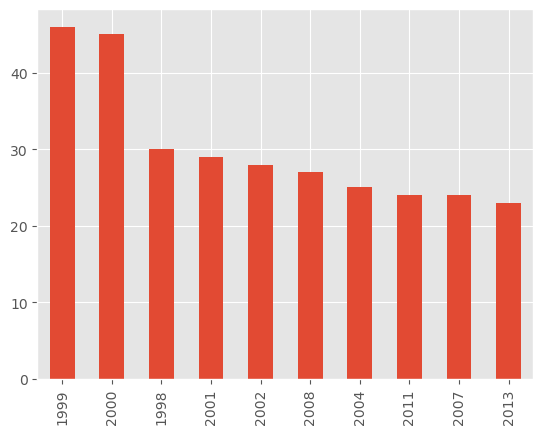

In [82]:
df['Year_Introduced'].value_counts().head(10).plot(kind='bar')
#df['Year_Introduced'].value_counts() \
#          .head(10) \
#           .plot(kind='bar')

<Axes: title={'center': 'Top Years Coasters Introduced'}>

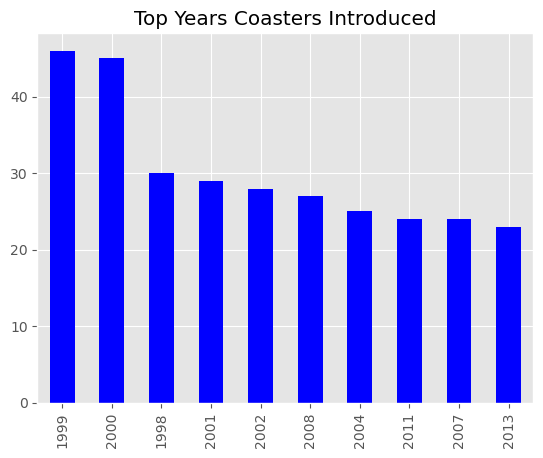

In [85]:
 df['Year_Introduced'].value_counts() \
          .head(10) \
         .plot(kind='bar', color='blue', title='Top Years Coasters Introduced')

Text(0, 0.5, 'Count')

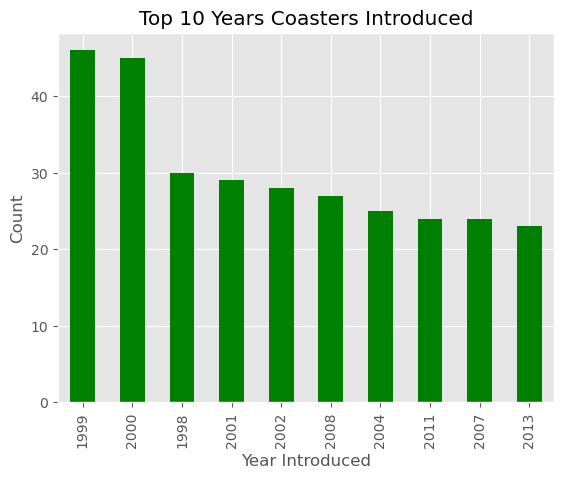

In [89]:
ax = df['Year_Introduced'].value_counts() \
          .head(10) \
         .plot(kind='bar', color='green', title='Top 10 Years Coasters Introduced')
ax.set_xlabel('Year Introduced')
ax.set_ylabel('Count')

<Axes: ylabel='Frequency'>

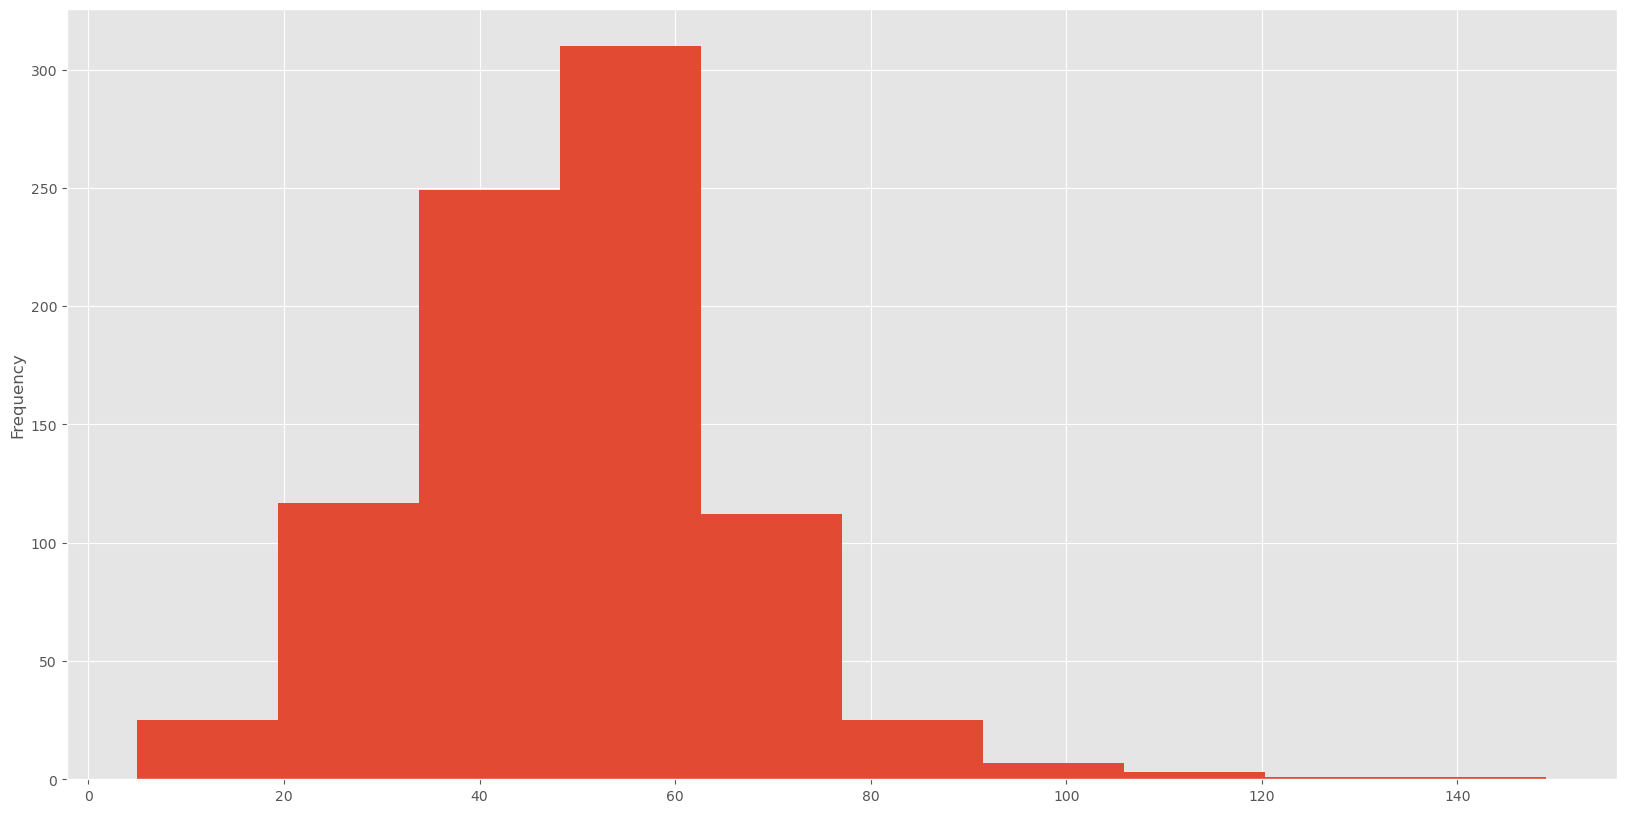

In [94]:
df['Speed_mph'].plot(kind='hist', figsize=(20,10))

<Axes: title={'center': 'Coaster Speed(mph) '}, ylabel='Frequency'>

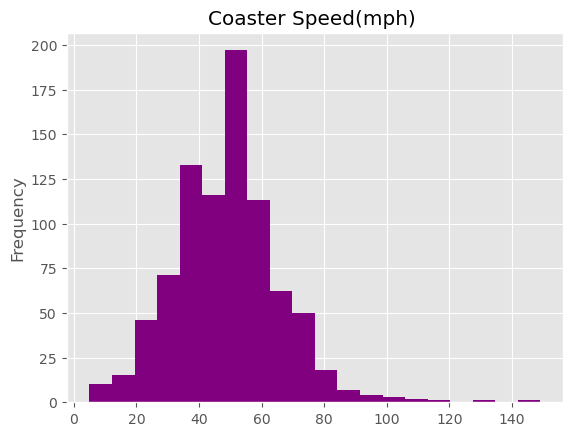

In [96]:
df['Speed_mph'].plot(kind='hist', bins=20, title='Coaster Speed(mph) ', color='purple')

Text(0.5, 0, 'Speed (mph)')

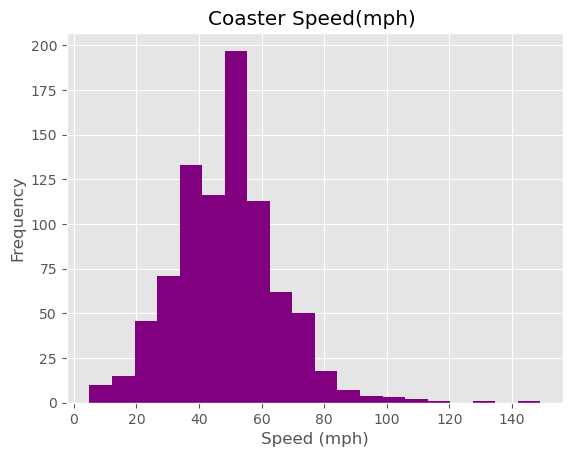

In [98]:
ax = df['Speed_mph'].plot(kind='hist', bins=20, title='Coaster Speed(mph) ', color='purple')
ax.set_xlabel('Speed (mph)')

Text(0.5, 0, 'Speed (mph)')

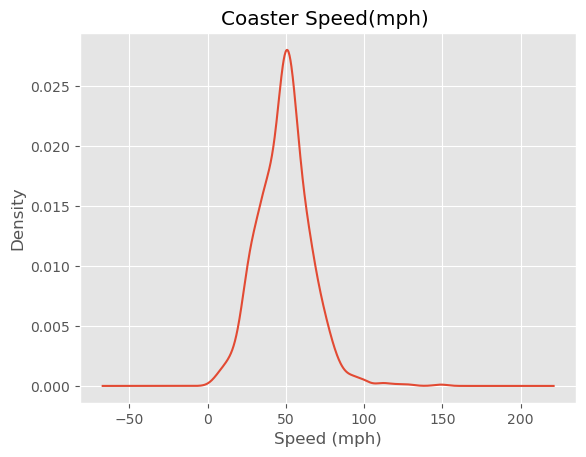

In [100]:
ax = df['Speed_mph'].plot(kind='kde', title='Coaster Speed(mph) ')
ax.set_xlabel('Speed (mph)')

### Step 4: Feature Relationship

- Scatterplot
- Heatmap Correlation
- Pairplot
- Groupby comparisons

In [102]:
df

,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,latitude,longitude,Type_Main,Opening_Date_Clean,Speed_mph,Height_ft,Inversions,Gforce
0,Switchback Railway,Coney Island,Removed,LaMarcus Adna Thompson,1884,40.5740,-73.9780,Wood,1884-06-16,6.0,NaN,0,2.9
1,Flip Flap Railway,Sea Lion Park,Removed,Lina Beecher,1895,40.5780,-73.9790,Wood,1895-01-01,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),"Cleveland, Ohio, United States",Closed,NaN,1896,41.5800,-81.5700,Other,NaT,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),Other,Removed,Edwin Prescott,1901,40.5745,-73.9780,Steel,1901-01-01,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),Other,Removed,Edwin Prescott,1901,39.3538,-74.4342,Steel,1901-01-01,NaN,NaN,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,Ice Breaker (roller coaster),SeaWorld Orlando,Under construction,Premier Rides,2022,28.4088,-81.4633,Steel,2022-02-01,52.0,NaN,0,NaN
986,Leviathan (Sea World),Sea World,Under construction,Martin & Vleminckx,2022,-27.9574,153.4263,Wood,2022-01-01,49.7,105.0,0,NaN
987,Pantheon (roller coaster),Busch Gardens Williamsburg,Under construction,Intamin,2022,37.2339,-76.6426,Steel,2022-01-01,73.0,NaN,2,NaN
988,Tumbili,Kings Dominion,Under construction,S&S – Sansei Technologies,2022,NaN,NaN,Steel,NaT,34.0,NaN,0,NaN


<Axes: title={'center': 'Coaster Speed vs. Height'}, xlabel='Speed_mph', ylabel='Height_ft'>

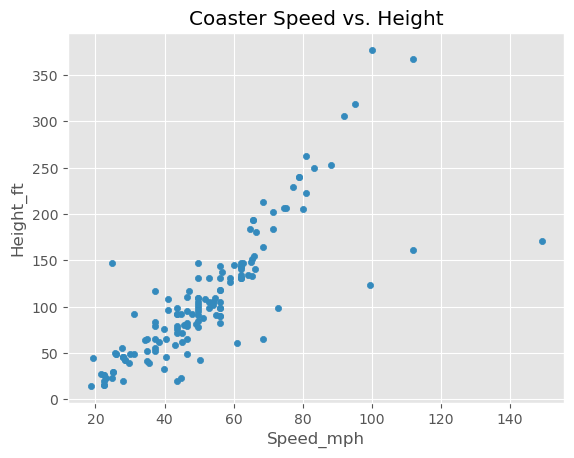

In [106]:
df.plot(kind='scatter', x='Speed_mph', 
                        y='Height_ft'   ,
                        title='Coaster Speed vs. Height'
)

<Axes: xlabel='Speed_mph', ylabel='Height_ft'>

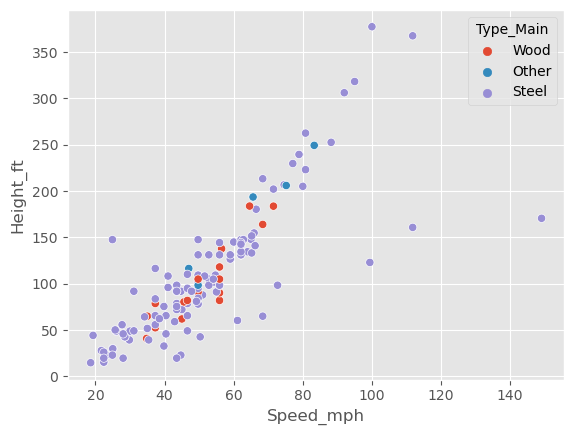

In [109]:
sns.scatterplot(data=df, x='Speed_mph', y='Height_ft', hue='Type_Main')

C:\Users\senay\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1070: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


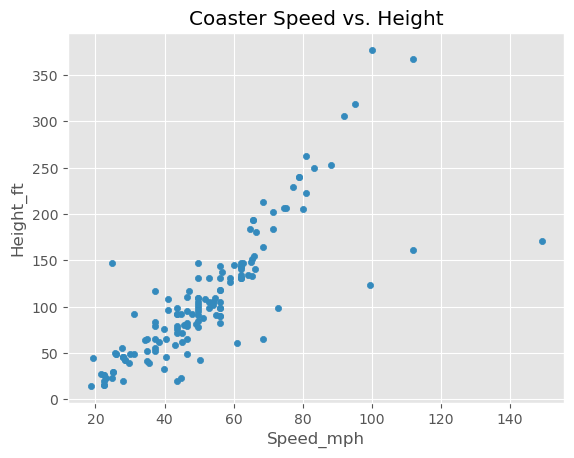

In [114]:
df.plot(kind='scatter', x='Speed_mph', 
                        y='Height_ft'   ,
                        title='Coaster Speed vs. Height'
)
plt.show()

<Axes: xlabel='Speed_mph', ylabel='Height_ft'>

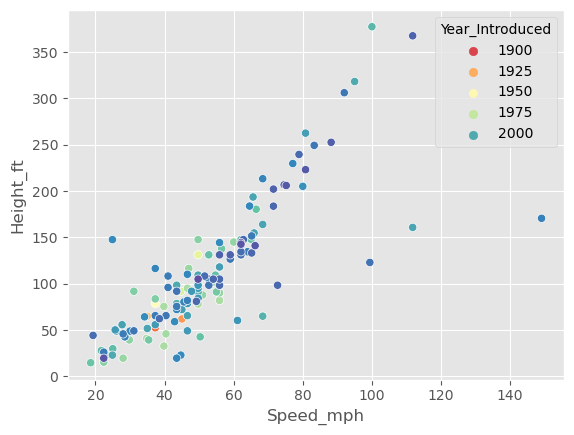

In [123]:
sns.scatterplot(data=df, x='Speed_mph', y='Height_ft', hue='Year_Introduced', palette='Spectral')

<Axes: xlabel='Speed_mph', ylabel='Height_ft'>

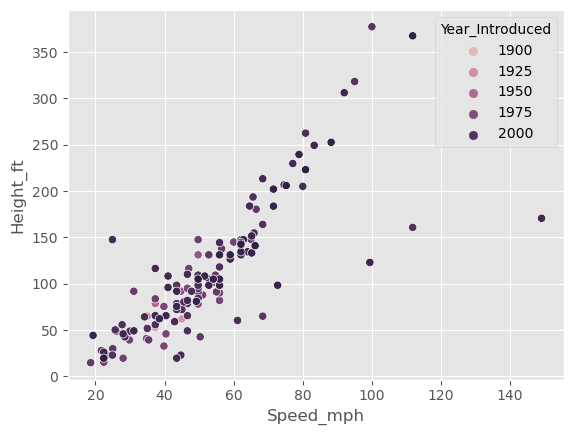

In [124]:
sns.scatterplot(data=df, x='Speed_mph', y='Height_ft', hue='Year_Introduced')

In [127]:
df.columns

Index(['Coaster_Name', 'Location', 'Status', 'Manufacturer', 'Year_Introduced',
       'latitude', 'longitude', 'Type_Main', 'Opening_Date_Clean', 'Speed_mph',
       'Height_ft', 'Inversions', 'Gforce'],
      dtype='object')

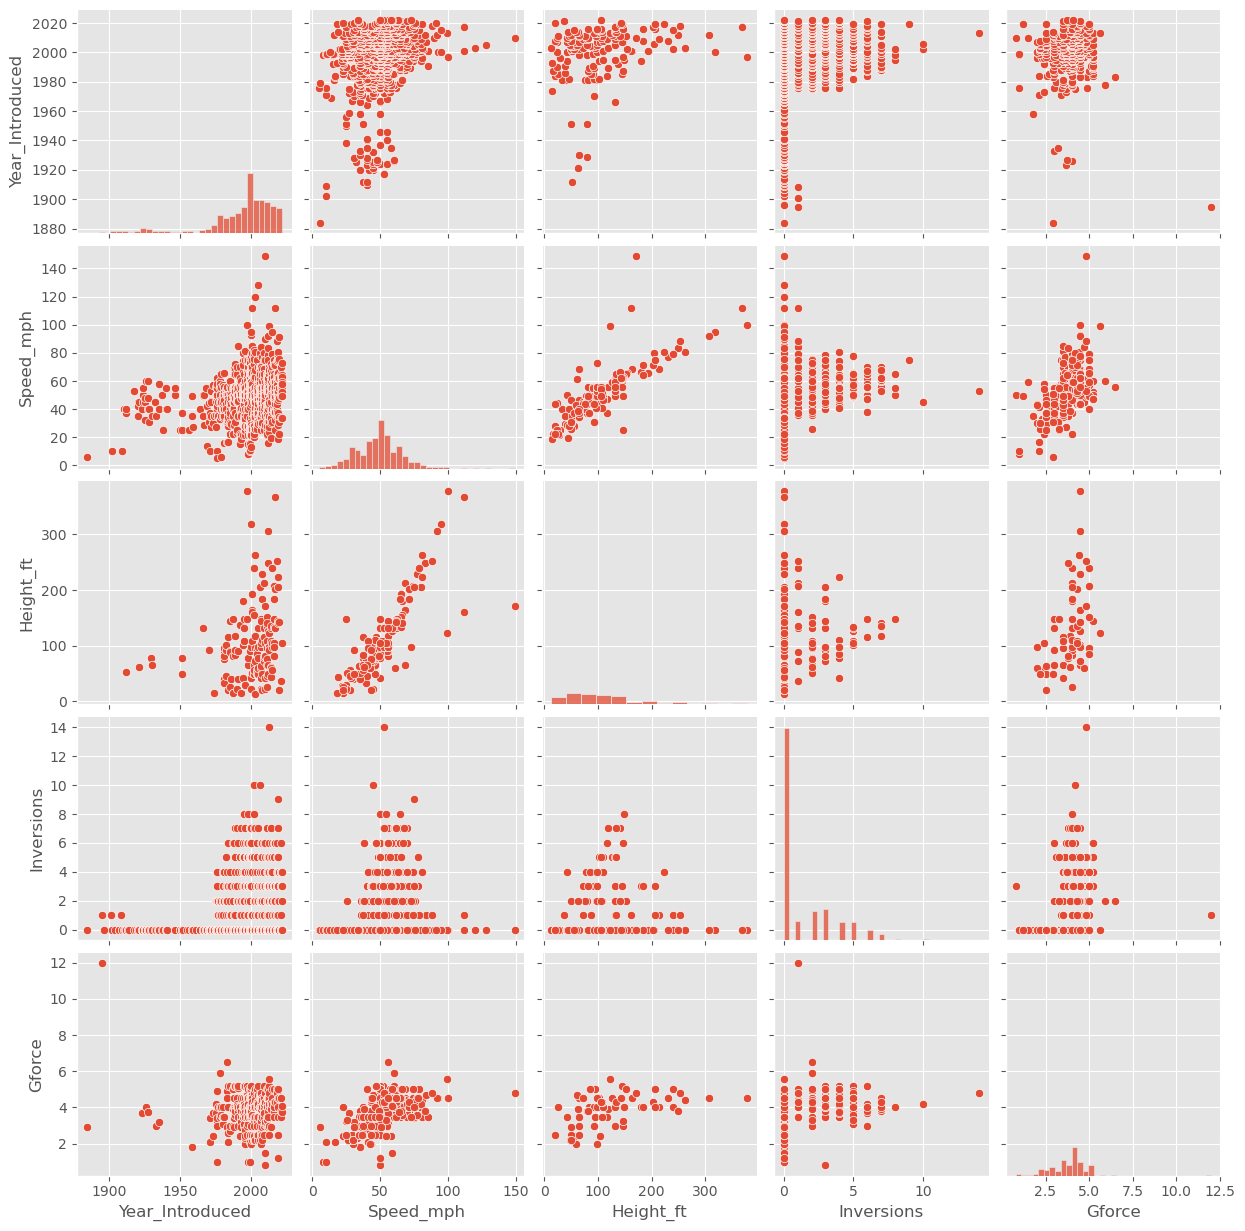

In [129]:
sns.pairplot(df, vars=['Year_Introduced', 'Speed_mph',
       'Height_ft', 'Inversions', 'Gforce'])
plt.show()

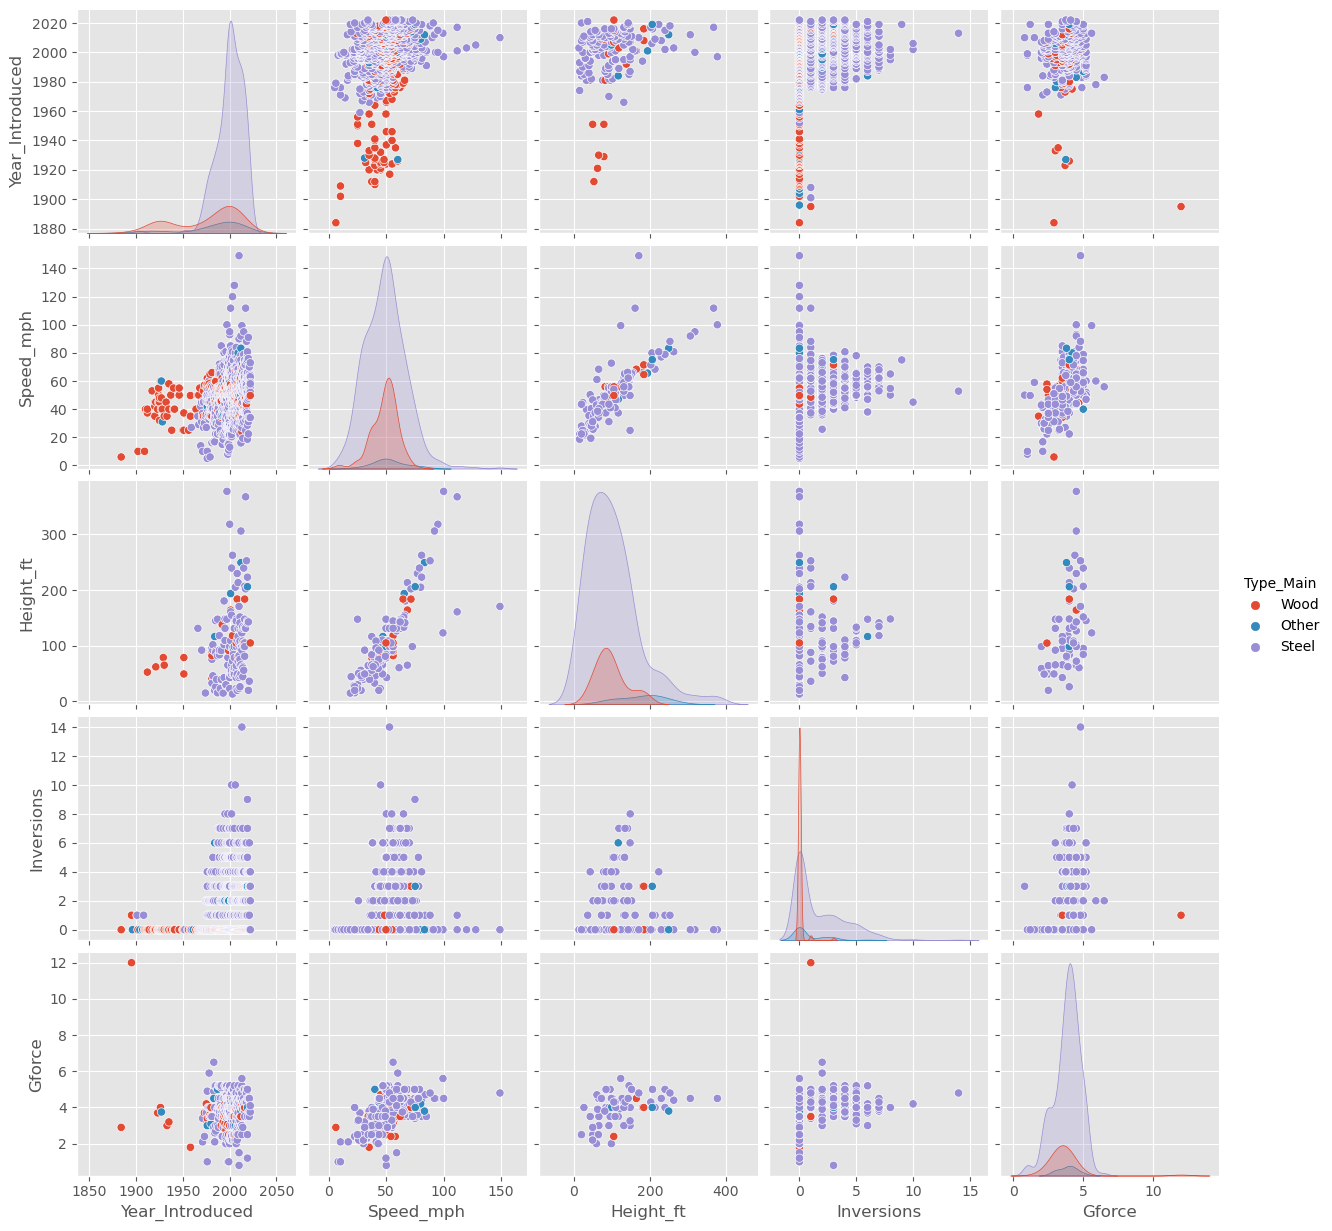

In [130]:
sns.pairplot(df, vars=['Year_Introduced', 'Speed_mph',
       'Height_ft', 'Inversions', 'Gforce'], hue='Type_Main')
plt.show()

In [110]:
df.corr()

,Year_Introduced,latitude,longitude,Speed_mph,Height_ft,Inversions,Gforce
Year_Introduced,1.000000,-0.069354,0.178767,0.225991,0.249487,0.233701,-0.073403
latitude,-0.069354,1.000000,-0.297532,-0.056193,0.020147,-0.000506,0.055499
longitude,0.178767,-0.297532,1.000000,0.054283,0.129088,0.080824,0.017657
Speed_mph,0.225991,-0.056193,0.054283,1.000000,0.823216,0.246593,0.503828
Height_ft,0.249487,0.020147,0.129088,0.823216,1.000000,0.138286,0.480465
Inversions,0.233701,-0.000506,0.080824,0.246593,0.138286,1.000000,0.339137
Gforce,-0.073403,0.055499,0.017657,0.503828,0.480465,0.339137,1.000000


<Axes: >

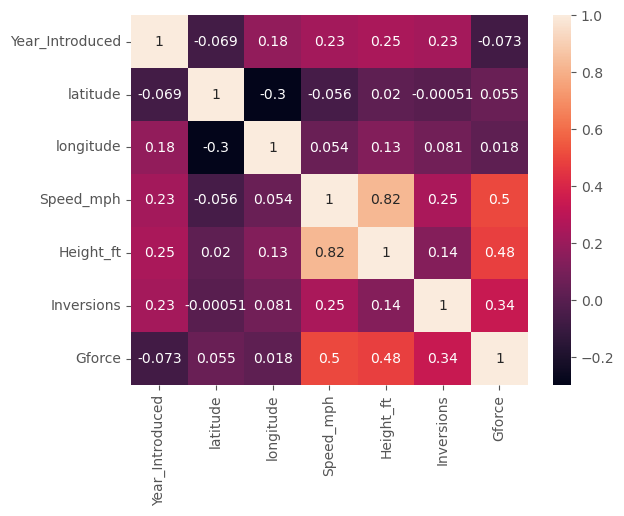

In [113]:
sns.heatmap(df.corr(), annot=True)

In [131]:
df[['Year_Introduced', 'Speed_mph',
       'Height_ft', 'Inversions', 'Gforce']].dropna().corr()

,Year_Introduced,Speed_mph,Height_ft,Inversions,Gforce
Year_Introduced,1.000000,0.171978,0.135413,-0.209887,0.160247
Speed_mph,0.171978,1.000000,0.733999,-0.028705,0.607383
Height_ft,0.135413,0.733999,1.000000,-0.079736,0.466482
Inversions,-0.209887,-0.028705,-0.079736,1.000000,0.275991
Gforce,0.160247,0.607383,0.466482,0.275991,1.000000


In [142]:
df_corr = df[['Year_Introduced', 'Speed_mph',
       'Height_ft', 'Inversions', 'Gforce']].dropna().corr()
df_corr

,Year_Introduced,Speed_mph,Height_ft,Inversions,Gforce
Year_Introduced,1.000000,0.171978,0.135413,-0.209887,0.160247
Speed_mph,0.171978,1.000000,0.733999,-0.028705,0.607383
Height_ft,0.135413,0.733999,1.000000,-0.079736,0.466482
Inversions,-0.209887,-0.028705,-0.079736,1.000000,0.275991
Gforce,0.160247,0.607383,0.466482,0.275991,1.000000


<Axes: >

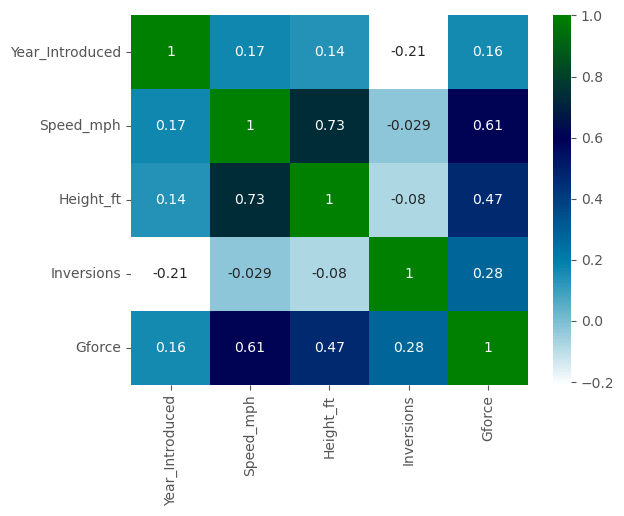

In [143]:
sns.heatmap(df_corr, annot=True, cmap='ocean_r' )

### Step 5:  Ask a question about the data

- Answer questions about the data with plots o statistics

What are the locations with the faster roller coasters (minimum of 10)?

In [144]:
df

,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,latitude,longitude,Type_Main,Opening_Date_Clean,Speed_mph,Height_ft,Inversions,Gforce
0,Switchback Railway,Coney Island,Removed,LaMarcus Adna Thompson,1884,40.5740,-73.9780,Wood,1884-06-16,6.0,NaN,0,2.9
1,Flip Flap Railway,Sea Lion Park,Removed,Lina Beecher,1895,40.5780,-73.9790,Wood,1895-01-01,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),"Cleveland, Ohio, United States",Closed,NaN,1896,41.5800,-81.5700,Other,NaT,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),Other,Removed,Edwin Prescott,1901,40.5745,-73.9780,Steel,1901-01-01,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),Other,Removed,Edwin Prescott,1901,39.3538,-74.4342,Steel,1901-01-01,NaN,NaN,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,Ice Breaker (roller coaster),SeaWorld Orlando,Under construction,Premier Rides,2022,28.4088,-81.4633,Steel,2022-02-01,52.0,NaN,0,NaN
986,Leviathan (Sea World),Sea World,Under construction,Martin & Vleminckx,2022,-27.9574,153.4263,Wood,2022-01-01,49.7,105.0,0,NaN
987,Pantheon (roller coaster),Busch Gardens Williamsburg,Under construction,Intamin,2022,37.2339,-76.6426,Steel,2022-01-01,73.0,NaN,2,NaN
988,Tumbili,Kings Dominion,Under construction,S&S – Sansei Technologies,2022,NaN,NaN,Steel,NaT,34.0,NaN,0,NaN


In [154]:
df['Location'].value_counts()

Other                            181
Kings Island                      19
Cedar Point                       18
Six Flags Magic Mountain          17
Hersheypark                       16
                                ... 
Granada Studios Tour               1
Funtown Splashtown USA             1
Tolchester Beach Park              1
Suzuka, Mie Prefecture, Japan      1
Epcot                              1
Name: Location, Length: 280, dtype: int64

In [153]:
df.query('Location != "Others"')

,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,latitude,longitude,Type_Main,Opening_Date_Clean,Speed_mph,Height_ft,Inversions,Gforce
0,Switchback Railway,Coney Island,Removed,LaMarcus Adna Thompson,1884,40.5740,-73.9780,Wood,1884-06-16,6.0,NaN,0,2.9
1,Flip Flap Railway,Sea Lion Park,Removed,Lina Beecher,1895,40.5780,-73.9790,Wood,1895-01-01,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),"Cleveland, Ohio, United States",Closed,NaN,1896,41.5800,-81.5700,Other,NaT,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),Other,Removed,Edwin Prescott,1901,40.5745,-73.9780,Steel,1901-01-01,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),Other,Removed,Edwin Prescott,1901,39.3538,-74.4342,Steel,1901-01-01,NaN,NaN,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,Ice Breaker (roller coaster),SeaWorld Orlando,Under construction,Premier Rides,2022,28.4088,-81.4633,Steel,2022-02-01,52.0,NaN,0,NaN
986,Leviathan (Sea World),Sea World,Under construction,Martin & Vleminckx,2022,-27.9574,153.4263,Wood,2022-01-01,49.7,105.0,0,NaN
987,Pantheon (roller coaster),Busch Gardens Williamsburg,Under construction,Intamin,2022,37.2339,-76.6426,Steel,2022-01-01,73.0,NaN,2,NaN
988,Tumbili,Kings Dominion,Under construction,S&S – Sansei Technologies,2022,NaN,NaN,Steel,NaT,34.0,NaN,0,NaN


In [159]:
df.query('Location != "Others"').groupby('Location')['Speed_mph'].agg(['mean','count'])

,mean,count
Location,,
"2904 Fantasy Way Myrtle Beach, South Carolina, U.S.",NaN,0
"63rd and N.W. Expressway, Oklahoma City, Oklahoma, U.S.",NaN,0
"8039 Beach BoulevardBuena Park, California 90620, U.S.",NaN,0
Adlabs Imagica,42.50,1
Adventure City,31.10,1
...,...,...
Xishuangbanna Theme Park,52.80,1
Yomiuriland,51.45,4
ZDT's Amusement Park,40.40,1


In [162]:
df.query('Location != "Others"').groupby('Location')['Speed_mph'].agg(['mean','count']).query('count>=10').sort_values(by='count',ascending=False)

,mean,count
Location,,
Other,44.575817,153
Kings Island,49.273684,19
Cedar Point,57.833333,18
Six Flags Magic Mountain,57.241176,17
Carowinds,43.571429,14
Hersheypark,50.576923,13
Alton Towers,42.791667,12
Canada's Wonderland,53.533333,12
Kings Dominion,52.083333,12


In [165]:
df.query('Location != "Others"')\
    .groupby('Location')['Speed_mph']\
    .agg(['mean','count'])\
    .query('count>=10')\
    .sort_values('mean')

,mean,count
Location,,
Alton Towers,42.791667,12
Carowinds,43.571429,14
Other,44.575817,153
Kings Island,49.273684,19
Hersheypark,50.576923,13
Kings Dominion,52.083333,12
Six Flags Great Adventure,53.036364,11
Canada's Wonderland,53.533333,12
Six Flags Magic Mountain,57.241176,17


<Axes: xlabel='Location'>

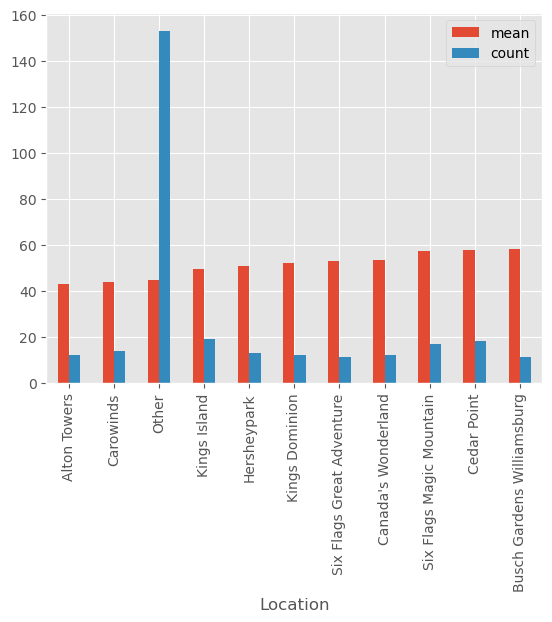

In [168]:
df.query('Location != "Others"')\
    .groupby('Location')['Speed_mph']\
    .agg(['mean','count'])\
    .query('count>=10')\
    .sort_values('mean')\
    .plot(kind='bar')

<Axes: title={'center': 'Average Coast Speed by Location'}, ylabel='Location'>

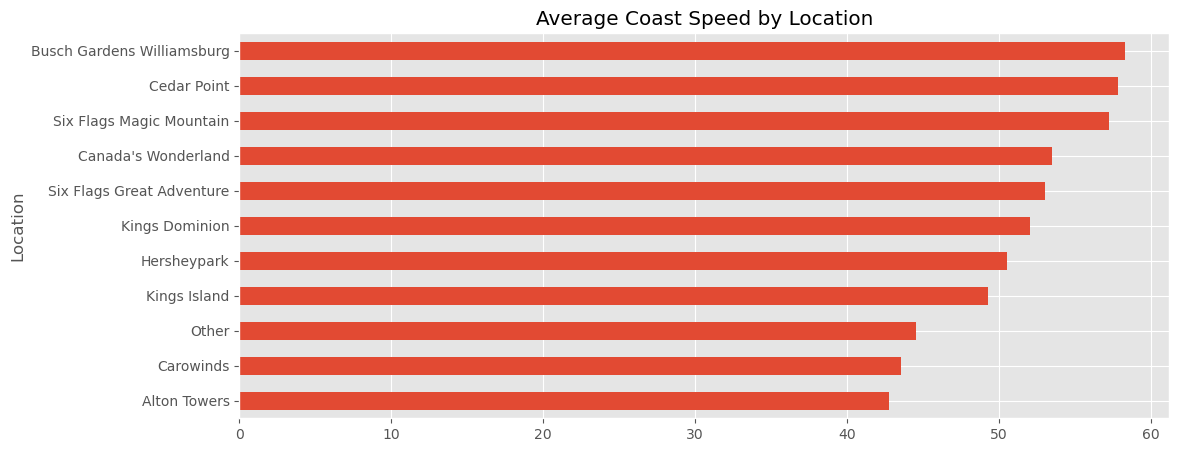

In [169]:
df.query('Location != "Others"')\
    .groupby('Location')['Speed_mph']\
    .agg(['mean','count'])\
    .query('count>=10')\
    .sort_values('mean')\
    ['mean'].plot(kind='barh', figsize=(12,5), title='Average Coast Speed by Location')

Text(0.5, 0, 'Average Coaster Speed')

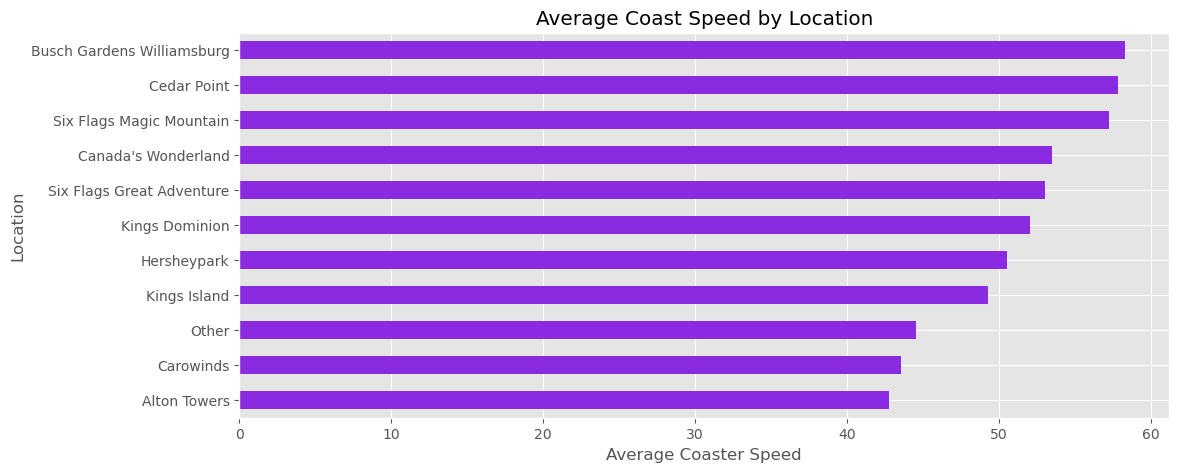

In [179]:
ax =df.query('Location != "Others"')\
    .groupby('Location')['Speed_mph']\
    .agg(['mean','count'])\
    .query('count>=10')\
    .sort_values('mean')\
    ['mean'].plot(kind='barh', color='blueviolet', figsize=(12,5), title='Average Coast Speed by Location')

ax.set_xlabel('Average Coaster Speed')